In [142]:
import seaborn as sns
import pandas as pd

In [143]:
# import pandas as pd
# import shutil
# import glob
# files = glob.glob("results/*")
# for file in files:
#     file_name = file.split("/")[1]
#     file_name = file_name.replace(":","-")
#     shutil.copy(file, f"window_results/{file_name}")

In [144]:
names_df = pd.read_csv("names.csv")

In [145]:
# race -> name -> percent female at birth
names_map = {}
for index, row in names_df.iterrows():
    race = row.iloc[1]
    name = row.iloc[2]
    percent = row.iloc[3]
    if race not in names_map:
        names_map[race] = {}
    names_map[race][name] = percent

In [146]:
names_map

{'Asian': {'Seung': 0.0,
  'Quoc': 0.0,
  'Dat': 0.0,
  'Nghia': 2.3,
  'Thuan': 2.4,
  'Thien': 2.7,
  'Hoang': 6.4,
  'Sang': 6.6,
  'Jun': 9.6,
  'Sung': 13.5,
  'Jie': 17.3,
  'Wei': 21.8,
  'Hyun': 39.0,
  'Khanh': 41.9,
  'Wen': 44.6,
  'Hien': 51.7,
  'An': 54.8,
  'Ji': 61.4,
  'In': 80.8,
  'Diem': 88.6,
  'Quyen': 88.9,
  'Ling': 91.3,
  'Xiao': 91.5,
  'Ngoc': 92.4,
  'Su': 95.4,
  'Hanh': 95.6,
  'Vy': 97.0,
  'Eun': 98.3,
  'Trinh': 100.0,
  'Huong': 100.0},
 'Black': {'Deontae': 0.0,
  'Antwon': 0.1,
  'Javonte': 1.0,
  'Dejon': 2.9,
  'Jamell': 3.4,
  'Dijon': 4.6,
  'Dashawn': 5.8,
  'Deshon': 6.2,
  'Pernell': 8.3,
  'Rashawn': 10.1,
  'Torrance': 13.2,
  'Semaj': 22.6,
  'Demetris': 25.6,
  'Kamari': 33.6,
  'Amari': 42.0,
  'Shamari': 56.1,
  'Kenyatta': 57.1,
  'Ivory': 59.3,
  'Chaka': 76.2,
  'Ashante': 89.4,
  'Unique': 89.9,
  'Kenya': 92.2,
  'Nikia': 93.8,
  'Akia': 94.3,
  'Kenyetta': 95.5,
  'Shante': 96.4,
  'Shaunta': 97.0,
  'Laquandra': 100.0,
  'Lakesia

In [147]:
results_df = pd.read_csv("accuracy_results.csv")

In [148]:
print(results_df)

      name1 name2   race  tp  fp  tn  fn  total
0        An   Dat  Asian   0   0   0  10     10
1        An   Dat  Asian   0   0   0  10     10
2        An   Dat  Asian   0   0   0  10     10
3        An   Dat  Asian   0   0   0  10     10
4        An   Dat  Asian   0   0   0  10     10
...     ...   ...    ...  ..  ..  ..  ..    ...
29686  Xiao   Wen  Asian   0   0   0  10     10
29687  Xiao   Wen  Asian   0   0   0  10     10
29688  Xiao   Wen  Asian   0   0   0  10     10
29689  Xiao   Wen  Asian   0   0   0  10     10
29690  Xiao   Wen  Asian   0   0   0  10     10

[29691 rows x 8 columns]


In [149]:
results_df["percent 1"] = results_df.apply(lambda x: names_map[x["race"]][x["name1"]], axis=1)
results_df["percent 2"] = results_df.apply(lambda x: names_map[x["race"]][x["name2"]], axis=1)

In [150]:
results_df

,name1,name2,race,tp,fp,tn,fn,total,percent 1,percent 2
0,An,Dat,Asian,0,0,0,10,10,54.8,0.0
1,An,Dat,Asian,0,0,0,10,10,54.8,0.0
2,An,Dat,Asian,0,0,0,10,10,54.8,0.0
3,An,Dat,Asian,0,0,0,10,10,54.8,0.0
4,An,Dat,Asian,0,0,0,10,10,54.8,0.0
...,...,...,...,...,...,...,...,...,...,...
29686,Xiao,Wen,Asian,0,0,0,10,10,91.5,44.6
29687,Xiao,Wen,Asian,0,0,0,10,10,91.5,44.6
29688,Xiao,Wen,Asian,0,0,0,10,10,91.5,44.6
29689,Xiao,Wen,Asian,0,0,0,10,10,91.5,44.6


In [151]:
results_df["bucket 1"] = pd.cut(x=results_df['percent 1'], bins=[-1, 2, 5, 10, 25, 50, 75, 90, 95, 98, 100], labels=["0-2", "2-5", "5-10", "10-25", "25-50", "50-75", "75-90", "90-95", "95-98", "98-100"])
results_df["bucket 2"] = pd.cut(x=results_df['percent 2'], bins=[-1, 2, 5, 10, 25, 50, 75, 90, 95, 98, 100], labels=["0-2", "2-5", "5-10", "10-25", "25-50", "50-75", "75-90", "90-95", "95-98", "98-100"])

In [153]:
# grouped_df = results_df.groupby(by=["bucket 1", "bucket 2"], as_index=False)["accuracy"].mean()
grouped_df = results_df.groupby(by=["race", "bucket 1", "bucket 2"], as_index=False)[["tp","tn","fp","fn","total"]].sum()

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_83019/920615068.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = results_df.groupby(by=["race", "bucket 1", "bucket 2"], as_index=False)[["tp","tn","fp","fn","total"]].sum()


In [168]:
grouped_df["precision"] = (grouped_df["tp"] / (grouped_df["tp"] + grouped_df["fp"])).round(2)
grouped_df["accuracy"] = ((grouped_df["tp"] + grouped_df["tn"]) / grouped_df["total"]).round(2)
grouped_df["recall"] = (grouped_df["tp"] / (grouped_df["tp"] + grouped_df["fn"])).round(2)
grouped_df["f1"] = (2 * (grouped_df["precision"] * grouped_df["recall"]) / (grouped_df["precision"] + grouped_df["recall"])).round(2)

In [169]:
def generate_heatmap(df, value):
    heatmap_df = pd.pivot_table(grouped_df, values=value, index='bucket 1',
                       columns='bucket 2')
    cmap = sns.light_palette("seagreen", as_cmap=True)
    ax = sns.heatmap(data=heatmap_df, cmap="Greens", annot=True)
    ax.set_xlabel("% Female")
    ax.set_ylabel("% Female")
    ax.set_title(value)

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_83019/2732139472.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df, values=value, index='bucket 1',


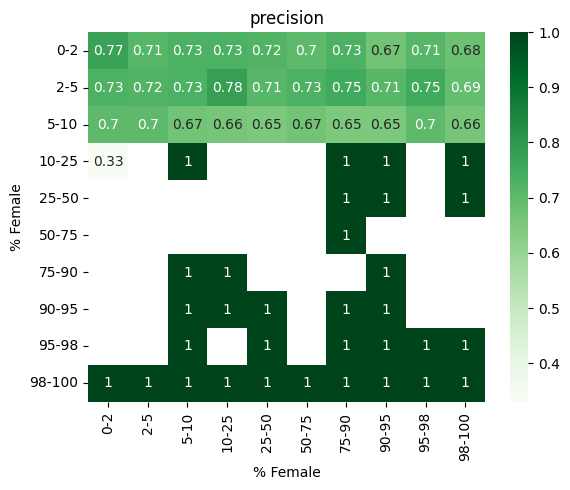

In [170]:
generate_heatmap(grouped_df, "precision")

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_83019/2732139472.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df, values=value, index='bucket 1',


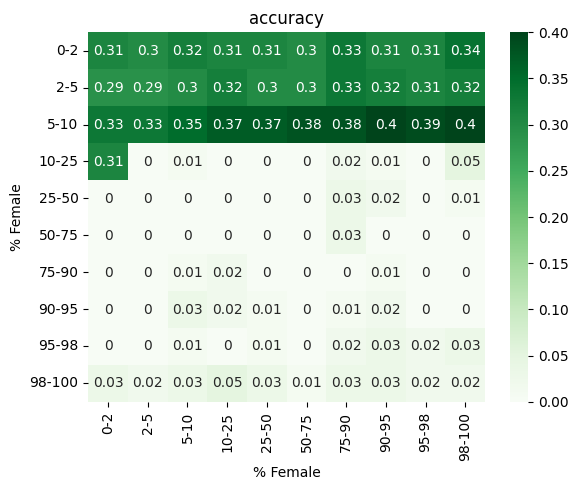

In [171]:
generate_heatmap(grouped_df, "accuracy")

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_83019/2732139472.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df, values=value, index='bucket 1',


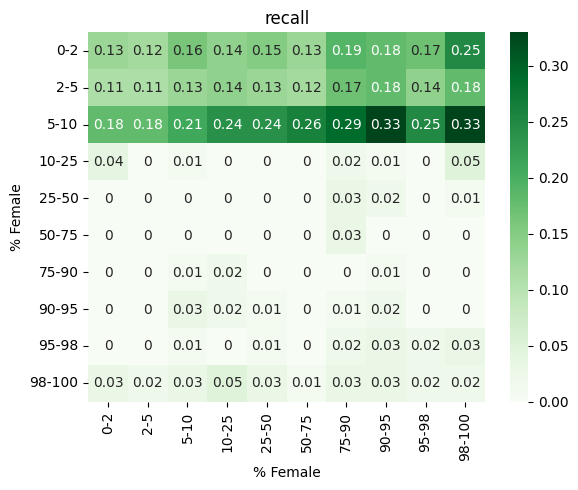

In [172]:
generate_heatmap(grouped_df, "recall")

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_83019/2732139472.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df, values=value, index='bucket 1',


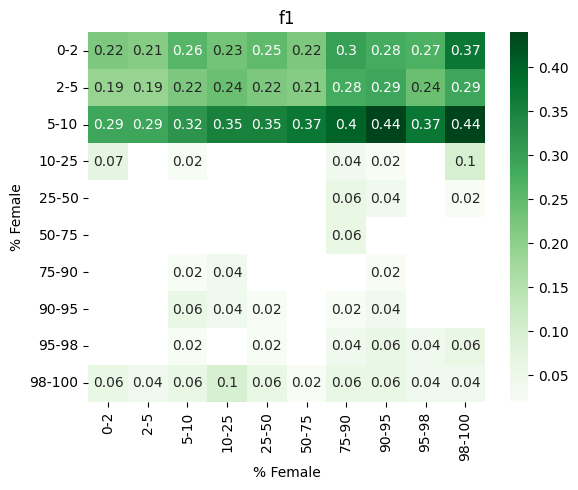

In [173]:
generate_heatmap(grouped_df, "f1")